In [12]:
import pandas as pd

In [13]:
pd.read_csv('../card_database.csv')

,id,name,type,desc,atk,def,level,race,attribute
0,34541863,"""A"" Cell Breeding Device",Spell Card,"During each of your Standby Phases, put 1 A-Co...",0,0,0,Continuous,Unknown
1,64163367,"""A"" Cell Incubator",Spell Card,Each time an A-Counter(s) is removed from play...,0,0,0,Continuous,Unknown
2,91231901,"""A"" Cell Recombination Device",Spell Card,Target 1 face-up monster on the field; send 1 ...,0,0,0,Quick-Play,Unknown
3,73262676,"""A"" Cell Scatter Burst",Spell Card,"Select 1 face-up ""Alien"" monster you control. ...",0,0,0,Quick-Play,Unknown
4,98319530,"""Infernoble Arms - Almace""",Spell Card,While this card is equipped to a monster: You ...,0,0,0,Equip,Unknown
...,...,...,...,...,...,...,...,...,...
10633,2648201,ZW - Sleipnir Mail,Effect Monster,"You can target 1 ""Utopia"" monster you control;...",1000,1000,4,Beast,LIGHT
10634,95886782,ZW - Sylphid Wing,Effect Monster,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",800,1600,4,Beast,LIGHT
10635,81471108,ZW - Tornado Bringer,Effect Monster,"You can target 1 ""Utopia"" monster you control;...",1300,1800,5,Dragon,WIND
10636,18865703,ZW - Ultimate Shield,Effect Monster,When this card is Normal or Special Summoned: ...,0,2000,4,Aqua,EARTH


#### After grayscaling an image, when reducing channels, a pixel intensity histogram gives us intuition about contrast, brightness, intensity distribution.

In [14]:
import cv2
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread('NEOS_test.jpg',0) 
  


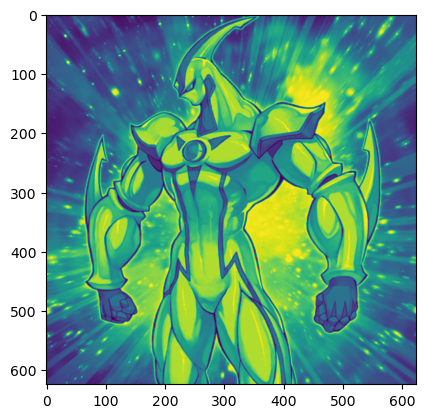

In [16]:
plt.imshow(img)

In [17]:
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 

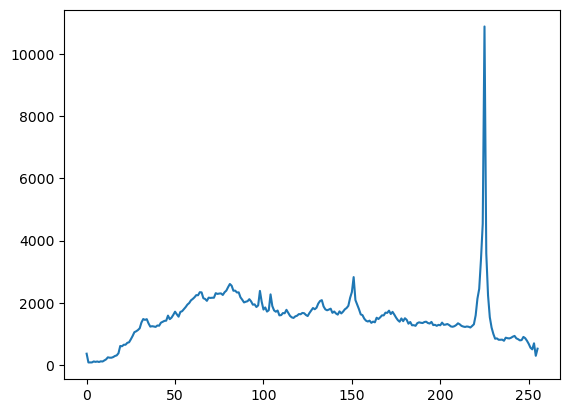

In [18]:
plt.plot(histr) 
plt.show()


Alternative way to do the same

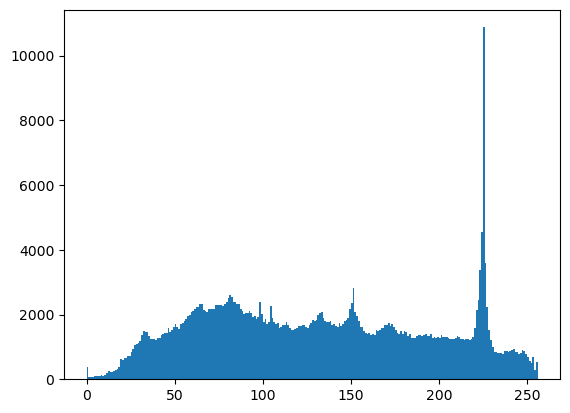

In [19]:


import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread('NEOS_test.jpg',0) 
  
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show() 


In [20]:
img2=cv2.imread('pendulum.jpg',0)

In [21]:
img.ravel().shape

(389376,)

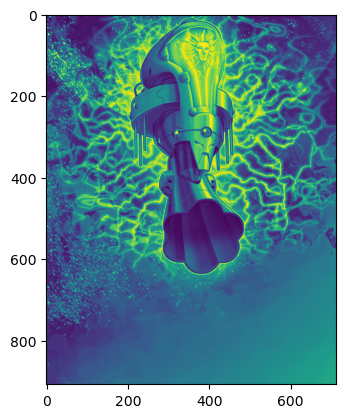

In [22]:
plt.imshow(img2)

In [23]:
img2.ravel().shape

(646496,)

In [24]:
img3 = cv2.imread('stardust.jpg',0)

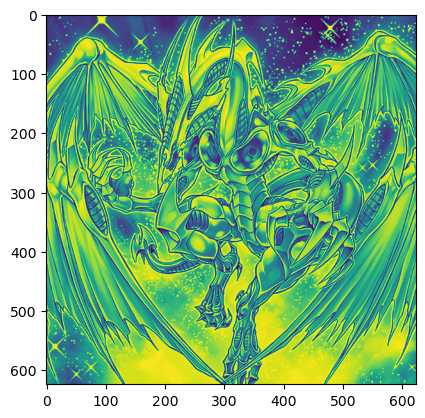

In [25]:
plt.imshow(img3)

In [26]:
img3.ravel().shape  

(389376,)

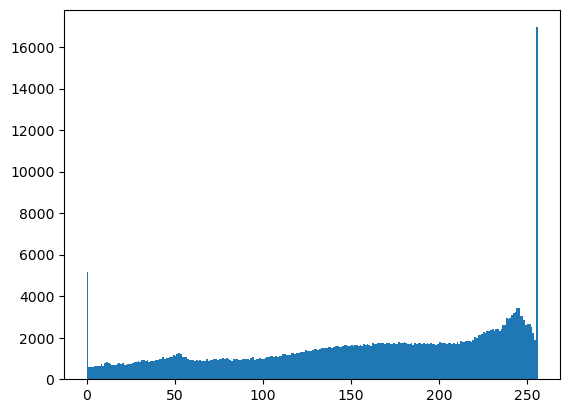

In [27]:
plt.hist(img3.ravel(),256,[0,256])
plt.show()

In [28]:
img4 = cv2.imread('doubledude.jpg',0)

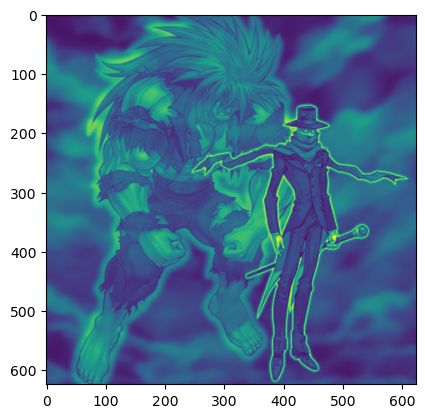

In [29]:
plt.imshow(img4)

In [30]:
img4.ravel().shape

(389376,)

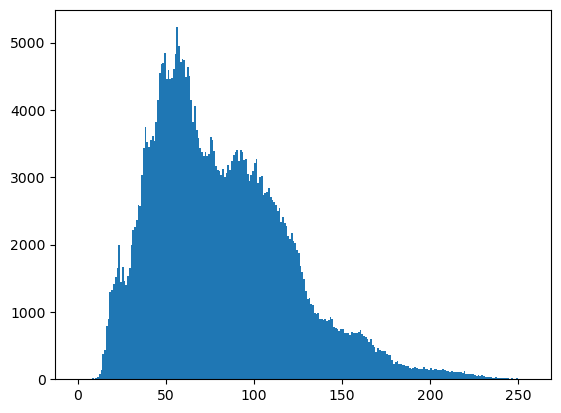

In [31]:
plt.hist(img4.ravel(),256,[0,256])
plt.show()

In [32]:
img.ravel().shape

(389376,)

In [33]:
pwd

'/workspaces/Generating-Yu-Gi-Oh-Monsters-From-Archetypes/image_analysis'

In [35]:
import os

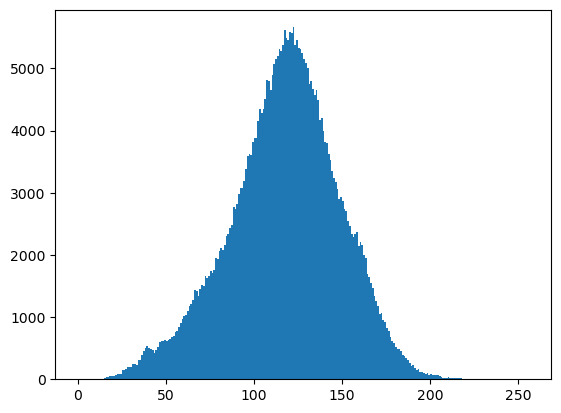

In [51]:
dataset_path = "test_folder"

img_count = len(os.listdir(dataset_path))
pixel_values = np.zeros(624*624)
for image in os.listdir(dataset_path):

    img = cv2.imread(os.path.join(dataset_path, image),0)
    # resize the image
    if img.shape[0] != 624 or img.shape[1] != 624:
        img = cv2.resize(img, (624, 624))
    # print(img.ravel().shape)
    pixel_values += img.ravel()
    # plt.show()
pixel_values = pixel_values / img_count
plt.hist(pixel_values,256,[0,256])
plt.show()

In [52]:
def avg_pixel_intensity(dataset_path, img_resize = (624, 624)):
    """Generates average pixel intensity histogram for a dataset of images.
    
    Args:
    dataset_path: string, path to the folder containing the images
    
    Returns:
    
    pixel_values: numpy array, average pixel intensity histogram
    
    """
    img_count = len(os.listdir(dataset_path))
    pixel_values = np.zeros(img_resize[0]*img_resize[1])
    for image in os.listdir(dataset_path):
        img = cv2.imread(os.path.join(dataset_path, image),0)
        # resize the image
        if img.shape[0] != img_resize[0] or img.shape[1] != img_resize[1]: 
            img = cv2.resize(img, (624, 624))
        pixel_values += img.ravel()
    pixel_values = pixel_values / img_count
    return pixel_values

In [53]:
def plot_avg_pixel_intensity(pixel_values):
    """Plots the average pixel intensity histogram.
    
    Args:
            pixel_values: numpy array, average pixel intensity histogram
    
    Returns:
            None
    """
    plt.hist(pixel_values,256,[0,256])
    plt.show()

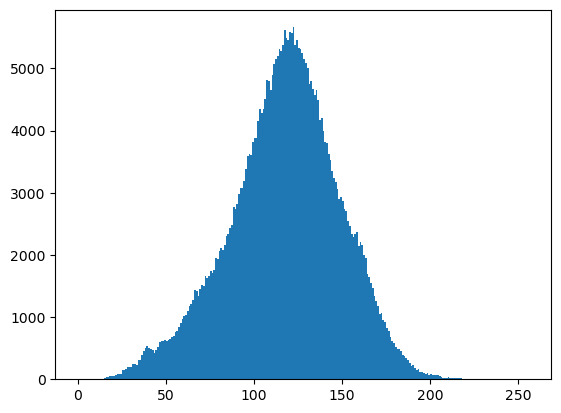

In [54]:

plot_avg_pixel_intensity(avg_pixel_intensity('test_folder'))
